In [9]:
from pprint import pprint

This illustrates the process of deploying an SQLite database to handle the SSM data in the ICGC Data Releases. 

For this, we'll use the next schema:

![schema](database_schema.png)

For this purpose, and to facilitate the handling of the data with Python, we'll be using the Object Relational Mapper library called [PonyORM](https://ponyorm.com/). This library helps map Python classes to SQL tables, to handle records as Python objects and to make queries as if making Python generators.

In [2]:
from pony import orm
from db_schema import (database,
                       Mutation,
                       Consequence,
                       OccurrenceByProject,
                       OccurrenceGlobal)

from mutationparser import read_mutations
from db_setup import load_mutations

In [3]:
# Create the SQLite database
database.bind(provider='sqlite',
              filename=':memory:',
              create_db=True)

# Map objects to tables
database.generate_mapping(create_tables=True)

In [4]:
# Open the file and read the mutations
mutations = read_mutations('../data/ssm_mixed.vcf')

# Add the mutations to the database
load_mutations( mutations )

Mutations already in the database: 0
Total mutations added to database: 0


In [12]:
consequences = Consequence.select()
mutations = Mutation.select()
print(len(consequences), len(mutations))

11743 23340


In [13]:
Consequence.select().show()

id   |gene...|gene...|gene...|tran...|tran...|prot...|cons...|cds_...|aa_m...
-----+-------+-------+-------+-------+-------+-------+-------+-------+-------
1    |       |       |       |       |       |       |inte...|       |       
2    |S1PR1  |ENSG...|+      |S1PR...|ENST...|       |upst...|       |       
3    |RP4-...|ENSG...|1      |RP4-...|ENST...|       |down...|       |       
4    |snoU13 |ENSG...|1      |snoU...|ENST...|       |upst...|       |       
5    |S1PR1  |ENSG...|+      |S1PR...|ENST...|       |upst...|       |       
6    |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|       |       
7    |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|       |       
8    |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|       |       
9    |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|       |       
10   |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|       |       
11   |C1or...|ENSG...|1      |C1or...|ENST...|       |down...|  

912  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|353C>T |S118F  
913  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|497C>T |S166F  
914  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |exon...|       |       
915  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|321C>T |S107S  
916  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|321C>T |S107S  
917  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|354C>T |S118S  
918  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|498C>T |S166S  
919  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|373G>A |A125T  
920  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|373G>A |A125T  
921  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|406G>A |A136T  
922  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |miss...|550G>A |A184T  
923  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|375G>T |A125A  
924  |KIAA...|ENSG...|+      |KIAA...|ENST...|       |syno...|37

2906 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2907 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2908 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2909 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2910 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2911 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2912 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2913 |STAT6  |ENSG...|1      |STAT...|ENST...|       |intr...|       |       
2914 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2915 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2916 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2917 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|       |       
2918 |STAT6  |ENSG...|1      |STAT...|ENST...|       |upst...|  

4423 |PLXDC1 |ENSG...|1      |PLXD...|ENST...|       |intr...|       |       
4424 |PLXDC1 |ENSG...|1      |PLXD...|ENST...|       |intr...|       |       
4425 |KRT26  |ENSG...|1      |KRT2...|ENST...|       |miss...|447T>G |I149M  
4426 |KRT26  |ENSG...|1      |KRT2...|ENST...|       |intr...|       |       
4427 |KRT26  |ENSG...|1      |KRT2...|ENST...|       |miss...|358G>A |E120K  
4428 |KRT26  |ENSG...|1      |KRT2...|ENST...|       |miss...|352T>C |W118R  
4429 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |miss...|872T>A |L291Q  
4430 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |miss...|872T>A |L291Q  
4431 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |down...|       |       
4432 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |exon...|       |       
4433 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |upst...|       |       
4434 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |exon...|       |       
4435 |DHX58  |ENSG...|1      |DHX5...|ENST...|       |down...|  

6399 |SLC3...|ENSG...|+      |SLC3...|ENST...|       |intr...|       |       
6400 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6401 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6402 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6403 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6404 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |upst...|       |       
6405 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6406 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6407 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |upst...|       |       
6408 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |intr...|       |       
6409 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |miss...|161C>T |T54M   
6410 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |miss...|1157C>T|T386M  
6411 |CCDC150|ENSG...|+      |CCDC...|ENST...|       |miss...|16

8097 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |syno...|306C>T |P102P  
8098 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |spli...|       |       
8099 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |spli...|       |       
8100 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|299C>T |T100M  
8101 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|299C>T |T100M  
8102 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|299C>T |T100M  
8103 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |exon...|       |       
8104 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |syno...|270C>T |A90A   
8105 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |syno...|270C>T |A90A   
8106 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |syno...|270C>T |A90A   
8107 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|220G>A |V74M   
8108 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|220G>A |V74M   
8109 |ZDHHC3 |ENSG...|1      |ZDHH...|ENST...|       |miss...|22

9772 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|2213G>A|R738Q  
9773 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|2213G>A|R738Q  
9774 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|710G>A |R237Q  
9775 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|2213G>A|R738Q  
9776 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|275G>A |R92Q   
9777 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |miss...|2213G>A|R738Q  
9778 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|2106G>A|T702T  
9779 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|2106G>A|T702T  
9780 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|603G>A |T201T  
9781 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|2106G>A|T702T  
9782 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|168G>A |T56T   
9783 |AHI1   |ENSG...|1      |AHI1...|ENST...|       |syno...|2106G>A|T702T  
9784 |PEX7   |ENSG...|+      |PEX7...|ENST...|       |intr...|  

11657|WDR13  |ENSG...|+      |WDR1...|ENST...|       |down...|       |       
11658|WDR13  |ENSG...|+      |WDR1...|ENST...|       |down...|       |       
11659|WDR13  |ENSG...|+      |WDR1...|ENST...|       |upst...|       |       
11660|WDR13  |ENSG...|+      |WDR1...|ENST...|       |down...|       |       
11661|WDR13  |ENSG...|+      |WDR1...|ENST...|       |down...|       |       
11662|WDR13  |ENSG...|+      |WDR1...|ENST...|       |down...|       |       
11663|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1471C>A|P491T  
11664|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1471C>A|P491T  
11665|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1415C>T|S472F  
11666|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1415C>T|S472F  
11667|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1387G>C|G463R  
11668|FAM120C|ENSG...|1      |FAM1...|ENST...|       |miss...|1387G>C|G463R  
11669|FAM120C|ENSG...|1      |FAM1...|ENST...|       |syno...|13

In [20]:
orm.select((c.cds_mutation, c.aa_mutation, c.mutations) for c in Consequence if c.aa_mutation).show()

c.cds_mutation|c.aa_mutation|c.mutations           
--------------+-------------+----------------------
738C>T        |P246P        |Mutation['MU4439329'] 
783C>T        |P261P        |Mutation['MU4439329'] 
723C>T        |G241G        |Mutation['MU4638147'] 
768C>T        |G256G        |Mutation['MU4638147'] 
676C>T        |R226*        |Mutation['MU41789329']
721C>T        |R241*        |Mutation['MU41789329']
670C>T        |R224W        |Mutation['MU33514014']
625C>T        |R209W        |Mutation['MU33514014']
647G>A        |R216H        |Mutation['MU4638156'] 
602G>A        |R201H        |Mutation['MU4638156'] 
646C>T        |R216C        |Mutation['MU63398013']
601C>T        |R201C        |Mutation['MU63398013']
622G>A        |A208T        |Mutation['MU47782927']
577G>A        |A193T        |Mutation['MU47782927']
518G>A        |R173H        |Mutation['MU1778575'] 
563G>A        |R188H        |Mutation['MU1778575'] 
              |A187         |Mutation['MU4890732'] 
            

19G>A         |G7S          |Mutation['MU23520680']
3493C>T       |L1165F       |Mutation['MU380603']  
28C>T         |L10F         |Mutation['MU380603']  
3502G>C       |A1168P       |Mutation['MU4728806'] 
37G>C         |A13P         |Mutation['MU4728806'] 
313C>T        |R105*        |Mutation['MU5447760'] 
309C>T        |L103L        |Mutation['MU4845012'] 
5620A>G       |T1874A       |Mutation['MU40154891']
              |RVTA1856     |Mutation['MU63637574']
1527C>A       |F509L        |Mutation['MU1960068'] 
1509G>T       |E503D        |Mutation['MU48508908']
1498G>C       |G500R        |Mutation['MU70107446']
466G>T        |E156*        |Mutation['MU5160381'] 
446C>G        |S149C        |Mutation['MU67017119']
359C>T        |S120F        |Mutation['MU67017121']
2263C>T       |L755L        |Mutation['MU55426436']
1885C>T       |L629L        |Mutation['MU55426436']
574C>T        |L192L        |Mutation['MU55426436']
2242C>T       |L748L        |Mutation['MU55426436']
2254G>A     

In [21]:
Mutation.select().show()

mutatio...|chromosome|GRCh37_pos|referen...|mutated...|quality|filter|occurre...
----------+----------+----------+----------+----------+-------+------+----------
MU56006960|1         |101697478 |C         |G         |.      |.     |Occurre...
MU66170198|1         |101697494 |T         |C         |.      |.     |Occurre...
MU28940329|1         |101697507 |CAT       |C         |.      |.     |Occurre...
MU53075011|1         |101697565 |G         |A         |.      |.     |Occurre...
MU48445352|1         |101697720 |G         |A         |.      |.     |Occurre...
MU66609923|1         |101697808 |A         |C         |.      |.     |Occurre...
MU2639955 |1         |101697899 |A         |C         |.      |.     |Occurre...
MU61394735|1         |101697954 |C         |T         |.      |.     |Occurre...
MU43523901|1         |101698022 |A         |T         |.      |.     |Occurre...
MU57242461|1         |1016981   |G         |A         |.      |.     |Occurre...
MU2650476 |1         |102580

MU65773723|1         |231975343 |C         |A         |.      |.     |Occurre...
MU60015613|1         |231975480 |T         |C         |.      |.     |Occurre...
MU53171829|1         |231975527 |CA        |TT        |.      |.     |Occurre...
MU53944188|1         |231975600 |G         |T         |.      |.     |Occurre...
MU1560547 |1         |231975606 |C         |T         |.      |.     |Occurre...
MU30612129|1         |231975693 |A         |G         |.      |.     |Occurre...
MU62476513|1         |231975753 |G         |A         |.      |.     |Occurre...
MU50260384|1         |233292005 |G         |A         |.      |.     |Occurre...
MU41605415|1         |233292026 |C         |T         |.      |.     |Occurre...
MU29072180|1         |233292090 |A         |G         |.      |.     |Occurre...
MU45212290|1         |233292126 |C         |T         |.      |.     |Occurre...
MU5440248 |1         |233292188 |C         |T         |.      |.     |Occurre...
MU69194735|1         |233292

MU6592363 |10        |83535602  |C         |T         |.      |.     |Occurre...
MU431017  |10        |83535605  |A         |T         |.      |.     |Occurre...
MU39955947|10        |83535610  |C         |T         |.      |.     |Occurre...
MU15944663|10        |83535612  |A         |C         |.      |.     |Occurre...
MU3536768 |10        |83535624  |C         |A         |.      |.     |Occurre...
MU18329238|10        |83535627  |T         |G         |.      |.     |Occurre...
MU51454819|10        |84261836  |T         |C         |.      |.     |Occurre...
MU46614370|10        |84261893  |C         |T         |.      |.     |Occurre...
MU70187265|10        |84261915  |T         |G         |.      |.     |Occurre...
MU29792621|10        |84261920  |GT        |G         |.      |.     |Occurre...
MU58079306|10        |8426193   |C         |T         |.      |.     |Occurre...
MU35069045|10        |84262001  |C         |T         |.      |.     |Occurre...
MU3484540 |10        |842620

MU49503121|12        |118894504 |C         |T         |.      |.     |Occurre...
MU2409471 |12        |118894705 |G         |T         |.      |.     |Occurre...
MU53092132|12        |118894709 |C         |T         |.      |.     |Occurre...
MU54518186|12        |119727746 |C         |T         |.      |.     |Occurre...
MU64975159|12        |119727780 |C         |T         |.      |.     |Occurre...
MU65762597|12        |119727813 |G         |A         |.      |.     |Occurre...
MU7554473 |12        |119727893 |A         |T         |.      |.     |Occurre...
MU63763565|12        |119728009 |G         |A         |.      |.     |Occurre...
MU49439293|12        |119728133 |G         |A         |.      |.     |Occurre...
MU59409506|12        |119728144 |CC        |TT        |.      |.     |Occurre...
MU43883133|12        |119728145 |C         |T         |.      |.     |Occurre...
MU59820731|12        |119728172 |C         |T         |.      |.     |Occurre...
MU70295782|12        |119728

MU64626928|14        |37894247  |T         |C         |.      |.     |Occurre...
MU46390057|14        |37894445  |G         |A         |.      |.     |Occurre...
MU61231883|14        |37894470  |C         |T         |.      |.     |Occurre...
MU7824751 |14        |37894793  |T         |C         |.      |.     |Occurre...
MU32143543|14        |37894906  |C         |A         |.      |.     |Occurre...
MU1393776 |14        |37894922  |A         |C         |.      |.     |Occurre...
MU62400208|14        |37895011  |G         |C         |.      |.     |Occurre...
MU49120621|14        |37895062  |C         |T         |.      |.     |Occurre...
MU54668545|14        |37895079  |G         |A         |.      |.     |Occurre...
MU26587242|14        |38855402  |T         |G         |.      |.     |Occurre...
MU40064528|14        |38855429  |G         |A         |.      |.     |Occurre...
MU53074570|14        |38855439  |G         |A         |.      |.     |Occurre...
MU50332369|14        |388554

MU30715294|17        |54750232  |G         |A         |.      |.     |Occurre...
MU65350080|17        |54750252  |A         |C         |.      |.     |Occurre...
MU3584281 |17        |54750306  |A         |T         |.      |.     |Occurre...
MU21317116|17        |54750328  |C         |A         |.      |.     |Occurre...
MU52595648|17        |54750430  |G         |A         |.      |.     |Occurre...
MU57168002|17        |54750443  |G         |A         |.      |.     |Occurre...
MU60823865|17        |54750529  |GG        |AA        |.      |.     |Occurre...
MU33970431|17        |54750571  |G         |A         |.      |.     |Occurre...
MU52864736|17        |54750580  |GG        |AA        |.      |.     |Occurre...
MU50369737|17        |54750673  |G         |A         |.      |.     |Occurre...
MU1962286 |17        |56386510  |G         |A         |.      |.     |Occurre...
MU28621283|17        |56386547  |AG        |A         |.      |.     |Occurre...
MU109964  |17        |563865

MU60106822|2         |14494909  |G         |T         |.      |.     |Occurre...
MU45951845|2         |14494913  |A         |G         |.      |.     |Occurre...
MU40230095|2         |146046685 |G         |A         |.      |.     |Occurre...
MU4723999 |2         |146046697 |A         |T         |.      |.     |Occurre...
MU54740319|2         |146046699 |G         |A         |.      |.     |Occurre...
MU6206239 |2         |146046723 |G         |C         |.      |.     |Occurre...
MU68016252|2         |146046749 |C         |CA        |.      |.     |Occurre...
MU61512729|2         |14604705  |G         |A         |.      |.     |Occurre...
MU66522519|2         |146047147 |C         |G         |.      |.     |Occurre...
MU59555503|2         |14604718  |G         |A         |.      |.     |Occurre...
MU64364488|2         |146047189 |AG        |A         |.      |.     |Occurre...
MU41114538|2         |146047204 |G         |T         |.      |.     |Occurre...
MU4731028 |2         |147013

MU29331391|20        |36627619  |C         |T         |.      |.     |Occurre...
MU58380697|20        |37931915  |G         |A         |.      |.     |Occurre...
MU51755475|20        |37931964  |C         |T         |.      |.     |Occurre...
MU14922161|20        |37931990  |A         |C         |.      |.     |Occurre...
MU71163033|20        |37932030  |T         |G         |.      |.     |Occurre...
MU63753920|20        |37932101  |T         |G         |.      |.     |Occurre...
MU29266450|20        |37932159  |C         |A         |.      |.     |Occurre...
MU63326419|20        |37932277  |C         |A         |.      |.     |Occurre...
MU22101226|20        |37932303  |T         |G         |.      |.     |Occurre...
MU36045408|20        |37932342  |T         |A         |.      |.     |Occurre...
MU5597297 |20        |37932349  |C         |T         |.      |.     |Occurre...
MU40169545|20        |38772282  |C         |T         |.      |.     |Occurre...
MU68532159|20        |387722

MU29325826|3         |50397632  |T         |G         |.      |.     |Occurre...
MU68798072|3         |50397895  |G         |T         |.      |.     |Occurre...
MU54372844|3         |50398001  |C         |T         |.      |.     |Occurre...
MU64324769|3         |5039803   |C         |G         |.      |.     |Occurre...
MU56244986|3         |5039826   |C         |T         |.      |.     |Occurre...
MU45366590|3         |50398288  |CC        |TT        |.      |.     |Occurre...
MU34900018|3         |50398497  |T         |TGC       |.      |.     |Occurre...
MU35741513|3         |50398503  |C         |T         |.      |.     |Occurre...
MU46750314|3         |51456139  |G         |A         |.      |.     |Occurre...
MU26891   |3         |51456160  |G         |C         |.      |.     |Occurre...
MU29763211|3         |51456168  |A         |G         |.      |.     |Occurre...
MU4714823 |3         |51456171  |G         |T         |.      |.     |Occurre...
MU29602490|3         |514561

MU4067854 |4         |29943833  |T         |A         |.      |.     |Occurre...
MU21281207|4         |29943836  |T         |G         |.      |.     |Occurre...
MU44056951|4         |30788805  |T         |G         |.      |.     |Occurre...
MU12555729|4         |3078892   |G         |A         |.      |.     |Occurre...
MU3993895 |4         |30788956  |C         |T         |.      |.     |Occurre...
MU58081246|4         |3078900   |A         |C         |.      |.     |Occurre...
MU38203172|4         |3078904   |CA        |C         |.      |.     |Occurre...
MU70237127|4         |3078913   |T         |A         |.      |.     |Occurre...
MU27114431|4         |30789191  |G         |A         |.      |.     |Occurre...
MU35111551|4         |30789271  |T         |C         |.      |.     |Occurre...
MU55605483|4         |30789507  |T         |A         |.      |.     |Occurre...
MU59048068|4         |30789620  |G         |A         |.      |.     |Occurre...
MU56022456|4         |319264

MU36398267|5         |52546726  |C         |A         |.      |.     |Occurre...
MU59204255|5         |52546770  |C         |T         |.      |.     |Occurre...
MU61876663|5         |52546812  |G         |A         |.      |.     |Occurre...
MU66662990|5         |54174740  |A         |G         |.      |.     |Occurre...
MU65963325|5         |54174787  |C         |T         |.      |.     |Occurre...
MU61643358|5         |54174839  |G         |A         |.      |.     |Occurre...
MU56464011|5         |54175019  |G         |A         |.      |.     |Occurre...
MU53714411|5         |54175029  |G         |A         |.      |.     |Occurre...
MU47610955|5         |54175064  |G         |A         |.      |.     |Occurre...
MU34016591|5         |54175153  |C         |A         |.      |.     |Occurre...
MU49903549|5         |54175154  |G         |A         |.      |.     |Occurre...
MU39501960|5         |54175206  |G         |A         |.      |.     |Occurre...
MU39501962|5         |541752

MU54275291|6         |73553358  |G         |A         |.      |.     |Occurre...
MU49521403|6         |73553367  |C         |T         |.      |.     |Occurre...
MU1305087 |6         |7355339   |T         |C         |.      |.     |Occurre...
MU36540195|6         |73553441  |C         |T         |.      |.     |Occurre...
MU6716313 |6         |73553488  |T         |G         |.      |.     |Occurre...
MU59291576|6         |73553501  |G         |A         |.      |.     |Occurre...
MU70120871|6         |73553591  |G         |A         |.      |.     |Occurre...
MU34624535|6         |73553592  |A         |C         |.      |.     |Occurre...
MU42348979|6         |74823855  |G         |A         |.      |.     |Occurre...
MU58010665|6         |74823881  |C         |T         |.      |.     |Occurre...
MU37623196|6         |74823917  |G         |A         |.      |.     |Occurre...
MU17966390|6         |74823925  |G         |A         |.      |.     |Occurre...
MU62989969|6         |748239

MU2998605 |7         |89071090  |T         |C         |.      |.     |Occurre...
MU54940848|7         |89071164  |C         |T         |.      |.     |Occurre...
MU62952227|7         |89071245  |C         |T         |.      |.     |Occurre...
MU51580352|7         |89071307  |C         |T         |.      |.     |Occurre...
MU63589623|7         |89071458  |G         |A         |.      |.     |Occurre...
MU23528958|7         |89071582  |T         |A         |.      |.     |Occurre...
MU1241384 |7         |89071590  |A         |G         |.      |.     |Occurre...
MU62810520|7         |89071597  |T         |A         |.      |.     |Occurre...
MU939391  |7         |89071625  |C         |A         |.      |.     |Occurre...
MU13007108|7         |89984934  |A         |T         |.      |.     |Occurre...
MU13007114|7         |89984935  |C         |A         |.      |.     |Occurre...
MU47953063|7         |89984937  |C         |T         |.      |.     |Occurre...
MU66754398|7         |899849

MU48937115|9         |27895099  |C         |T         |.      |.     |Occurre...
MU70983225|9         |27895151  |T         |G         |.      |.     |Occurre...
MU54777620|9         |27895154  |G         |A         |.      |.     |Occurre...
MU48201259|9         |27895191  |A         |G         |.      |.     |Occurre...
MU71058612|9         |27895199  |T         |C         |.      |.     |Occurre...
MU438957  |9         |27895209  |T         |G         |.      |.     |Occurre...
MU50412142|9         |27895271  |T         |C         |.      |.     |Occurre...
MU28264427|9         |27895349  |T         |G         |.      |.     |Occurre...
MU57893269|9         |27895363  |G         |A         |.      |.     |Occurre...
MU45029604|9         |28799863  |T         |A         |.      |.     |Occurre...
MU47726344|9         |28799865  |C         |T         |.      |.     |Occurre...
MU4056836 |9         |28799912  |T         |A         |.      |.     |Occurre...
MU64502645|9         |287999

In [22]:
OccurrenceGlobal.select().show()

id |project_c...|mutation    |affected_...|tested_do...|studies|frequency   
---+------------+------------+------------+------------+-------+------------
1  |1           |C>G         |1           |10648       |       |9.3914350...
2  |1           |T>C         |1           |10648       |       |9.3914350...
3  |1           |AT>-        |1           |10648       |       |9.3914350...
4  |1           |G>A         |1           |10648       |       |9.3914350...
5  |1           |A>C         |1           |10648       |       |9.3914350...
6  |1           |C>T         |1           |10648       |       |9.3914350...
7  |1           |A>T         |1           |10648       |       |9.3914350...
8  |1           |A>G         |1           |10648       |       |9.3914350...
9  |1           |G>T         |1           |10648       |       |9.3914350...
10 |1           |G>C         |1           |10648       |       |9.3914350...
11 |1           |T>G         |1           |10648       |       |9.3914350...

In [25]:
query = orm.select( (o.affected_donors, orm.count(o)) for o in OccurrenceGlobal )
query.show()
recurrence = list(query)


o.affected_donors|orm.count(o)
-----------------+------------
1                |239         
2                |56          
3                |32          
4                |24          
5                |9           
6                |4           
7                |4           
8                |1           
10               |1           


[(1, 239), (2, 56), (3, 32), (4, 24), (5, 9), (6, 4), (7, 4), (8, 1), (10, 1)]


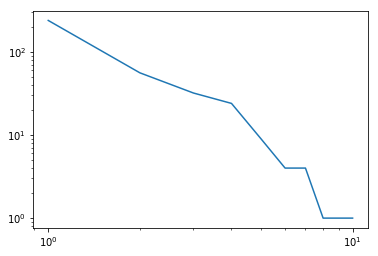

In [27]:
# < -- Plot the distribution
% matplotlib inline
import matplotlib.pyplot as plt

print(recurrence)

x = [ point[0] for point in recurrence ]
y = [ point[1] for point in recurrence ]

plt.plot(x, y)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [30]:
orm.show(Consequence)

class Consequence(Entity,GetMixin):
    id = PrimaryKey(int, auto=True)
    gene_symbol = Optional(str, default='')
    gene_affected = Optional(str, default='')
    gene_strand = Optional(str, default='')
    transcript_name = Optional(str, default='')
    transcript_affected = Optional(str, default='')
    protein_affected = Optional(str, default='')
    consequence_type = Optional(str, default='')
    cds_mutation = Optional(str, default='')
    aa_mutation = Optional(str, default='')
    mutations = Set(Mutation)


---

In [5]:
from mutationparser import read_mutations

# Open the file and read the mutations
mutations = read_mutations('../data/ssm_mixed.vcf')

In [10]:
for i,m in enumerate(mutations):
    if i > 10:
        break
    pprint(m)

{'GRCh37_pos': 102580392,
 'chromosome': '1',
 'consequences': [{'aa_mutation': '',
                   'cds_mutation': '',
                   'consequence_type': 'intergenic_region',
                   'gene_affected': '',
                   'gene_strand': '',
                   'gene_symbol': '',
                   'protein_affected': '',
                   'transcript_affected': '',
                   'transcript_name': ''}],
 'filter': '.',
 'mutated_allele': 'T',
 'mutation_id': 'MU4646653',
 'occurrence_by_project': [{'affected_donors': 1,
                            'frequency': 0.00388,
                            'project_code': 'LIRI-JP',
                            'tested_donors': 258}],
 'occurrence_global': {'affected_donors': 1,
                       'frequency': 9.391435011269723e-05,
                       'mutation': 'A>T',
                       'project_count': 1,
                       'tested_donors': 10648},
 'quality': '.',
 'reference_allele': 'A'}
{'GRCh37_pos

In [13]:
# %load mutationparser.py
"""
VCF mutations file parser.

Module with functions destined to parse mutations in a VCF file with the
format of the ICGC Data Release's SSM aggregate.

Usage is mostly of the function read_mutations that disassembles the mutation 
into a dictionary.

Example::

       file_with_mutations = 'ssm.aggregated.vcf'
       
       for mutation in read_mutations(filename):
           print(mutation)
"""

from collections import namedtuple




# < --- VCF file parsing

def clean_mutations(filename):
    """
    Helper function that returns a generator of the mutations parsed from the file.
    
    The format is suitable for creating a first file for database setup.
    """
    for raw_mutation in open_vcf(filename):
        # Yield the parsed mutation
        yield clean_mutation(raw_mutation)
# ---

def open_vcf(filename):
    """A generator to handle VCF files easily.
    
    Open the file with the given filename and yield every line that doesn't
    start with '#' (such as comment and header lines)
    """
    # Open the VCF file
    with open(filename) as file:
        # Yield only the lines that aren't comments
        for line in file:
            if not line.startswith('#'):
                yield line
# ---
    
    
    
# < --- Mutation parsing

# < -- Parse the raw mutation 

def clean_mutation(raw_mutation):
    """Decompose a raw mutation line into fields, returns it as a dict"""
    # The fields the mutation is composed of
    fields = ['chromosome', 'GRCh37_pos', 
              'mutation_id', 'reference_allele', 
              'mutated_allele', 'quality', 
              'filter', 'rawINFO'
             ]
    # Split the mutation into fields and eliminate newline
    mutation_splitted = raw_mutation.strip().split('\t')
    # Assemble the mutation
    mutation = dict( zip(fields, mutation_splitted) )
    # Clean the fields
    mutation['GRCh37_pos'] = mutation['GRCh37_pos']
    mutation.update( clean_INFO(mutation['rawINFO']) ) # Parse the INFO field
    del mutation['rawINFO']
    # Return the mutation
    return mutation
# ---


# < < -- Functions to parse the INFO field


def clean_INFO(rawINFO):
    """Parse the raw text INFO field of a mutation into:
        - consecuences
            + gene_symbol
            + gene_affected
            + gene_strand
            + transcript_name
            + transcript_affected
            + protein_affected
            + consequence_type
            + cds_mutation
            + aa_mutation
            
        - occurrence_by_project
            + project_code
            + affected_donors
            + tested_donors
            + frequency
            
        - occurrence_global
            + affected_donors
            + tested_donors
            + mutation
            + frequency
            
    Returns the dictionary with the corresponding data
    """
    # Split the data into fields
    consequences, occurrence_by_project, *occurrence_global = rawINFO.split(';')
    # Clean the fields
    INFO = dict()
    INFO['consequences'] = clean_consequences(consequences)
    INFO['occurrence_by_project'] = \
                clean_occurrences_by_project(
                        occurrence_by_project
                )
    INFO['occurrence_global'] = \
                clean_occurrence_global(
                        occurrence_global
                )
    return INFO
# ---


# < < < -- Functions to parse the CONSEQUENCE subfield


def clean_consequences(raw_consequences):
    """Splits the raw comma-sepparated consequences into fields:
        + gene_symbol
        + gene_affected
        + gene_strand
        + transcript_name
        + transcript_affected
        + protein_affected
        + consequence_type
        + cds_mutation
        + aa_mutation
    * These are pipe-sepparated (|) fields
    """
    # Remove the trailing 'CONSEQUENCE=' string
    _ , trimmed_consequences = raw_consequences.split('=')
    # Separate each consequence
    consequences = trimmed_consequences.split(',')
    # Parse each consequence field
    return consequences
# ---

# < < < -- Functions to parse the OCCURRENCE subfield (corresponding to occurrence per project)


def clean_occurrences_by_project(raw_occurrences):
    """Splits the raw comma-sepparated occurrences into fields:
        + project_code
        + affected_donors
        + tested_donors
        + frequency
    * These are pipe-separated (|) fields
    """
    # Remove the trailing 'OCCURRENCE=' string
    _ , trimmed_occurrences = raw_occurrences.split('=')
    # Separate each occurrence
    occurrences = trimmed_occurrences.split(',')
    # Parse each occurrence field
    return occurrences
# ---

# < < < -- Functions to parse the global occurrence

def clean_occurrence_global(raw_occurrence):
    """Splits the raw comma-separated fields of the global occurrence:
        + affected_donors
        + mutation
        + project_count
        + tested_donors
        + frequency
	+ studies
    """
    # Separate into the corresponding fields
    occurrence = dict([ keyvalue.split('=') for keyvalue in raw_occurrence ])
    return occurrence
# ---


In [17]:
# Open the file and read the mutations
mutations = clean_mutations('../data/ssm_mixed.vcf')

In [15]:
for i,m in enumerate(mutations):
    if i > 10:
        break
    pprint(m)

{'GRCh37_pos': '101697478',
 'chromosome': '1',
 'consequences': ['||||||intergenic_region||',
                  'S1PR1|ENSG00000170989|+|S1PR1-001|ENST00000305352||upstream_gene_variant||',
                  'RP4-575N6.4|ENSG00000225938|1|RP4-575N6.4-001|ENST00000432195||downstream_gene_variant||',
                  'snoU13|ENSG00000238296|1|snoU13.3-201|ENST00000459166||upstream_gene_variant||'],
 'filter': '.',
 'mutated_allele': 'G',
 'mutation_id': 'MU56006960',
 'occurrence_by_project': ['LUSC-KR|1|66|0.01515'],
 'occurrence_global': {'affected_donors': '1',
                       'mutation': 'C>G',
                       'project_count': '1',
                       'tested_donors': '10648'},
 'quality': '.',
 'reference_allele': 'C'}
{'GRCh37_pos': '101697494',
 'chromosome': '1',
 'consequences': ['||||||intergenic_region||',
                  'S1PR1|ENSG00000170989|+|S1PR1-001|ENST00000305352||upstream_gene_variant||',
                  'RP4-575N6.4|ENSG00000225938|1|RP4-575N6

In [19]:
def head(iterator, n):
    for i, item in enumerate(iterator):
        if i>=n:
            break
        yield item

In [23]:
for m in head(mutations, 10):
    for c in m['consequences']:
        for oc in m['occurrence_by_project']:
            pprint((m['mutation_id'], c, oc))
            

('MU48445352', '||||||intergenic_region||', 'MELA-AU|1|183|0.00546')
('MU48445352',
 'S1PR1|ENSG00000170989|+|S1PR1-001|ENST00000305352||upstream_gene_variant||',
 'MELA-AU|1|183|0.00546')
('MU48445352',
 'RP4-575N6.4|ENSG00000225938|1|RP4-575N6.4-001|ENST00000432195||downstream_gene_variant||',
 'MELA-AU|1|183|0.00546')
('MU48445352',
 'snoU13|ENSG00000238296|1|snoU13.3-201|ENST00000459166||upstream_gene_variant||',
 'MELA-AU|1|183|0.00546')
('MU48445352',
 'S1PR1|ENSG00000170989|+|S1PR1-003|ENST00000475821||upstream_gene_variant||',
 'MELA-AU|1|183|0.00546')
('MU66609923', '||||||intergenic_region||', 'BRCA-EU|1|560|0.00179')
('MU66609923',
 'S1PR1|ENSG00000170989|+|S1PR1-001|ENST00000305352||upstream_gene_variant||',
 'BRCA-EU|1|560|0.00179')
('MU66609923',
 'RP4-575N6.4|ENSG00000225938|1|RP4-575N6.4-001|ENST00000432195||downstream_gene_variant||',
 'BRCA-EU|1|560|0.00179')
('MU66609923',
 'snoU13|ENSG00000238296|1|snoU13.3-201|ENST00000459166||upstream_gene_variant||',
 'BRCA-EU|1|